In [28]:
import numpy as np
import pandas as pd
import math 
import matplotlib.pyplot as plt
%matplotlib inline

#http://data.un.org/Explorer.aspx
# Create a DataFrame using pandas read_csv()
df = pd.read_csv('~/thinkful_mac/prep_course_files/UNdata_Export_20180916_212215184.csv')

In [29]:
# Take a quick look at the data structure
df.head()

,Country or Area,Year,Value
0,Australia,2015,402159.569954
1,Australia,2014,393572.068527
2,Australia,2013,398292.628671
3,Australia,2012,407140.007742
4,Australia,2011,404273.380358


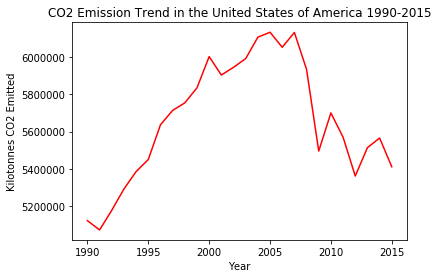

In [30]:
# Isolate USA and plot CO2 emissions over time (1990-2013)
df2 = df.loc[lambda df2: df['Country or Area'] == 'United States of America', :]
plt.plot(df2['Year'], df2['Value'], color = 'red')
plt.xlabel('Year')
plt.ylabel('Kilotonnes CO2 Emitted')
plt.title('CO2 Emission Trend in the United States of America 1990-2015')
plt.show()
#The data shows a gradually increasing trend before 2008-2009, when the US (and the rest of the world) went into 
#a recession, which likely drove the drop from 2008-2011 (although I would need more data to test this hypothesis. 

In [31]:
# Find minimum and maximum years of data by country
print(df.groupby('Country or Area').min())
print(df.groupby('Country or Area').max())

                          Year         Value
Country or Area                             
Australia                 1990  2.783528e+05
Austria                   1990  6.043220e+04
Belarus                   1990  5.395073e+04
Belgium                   1990  9.653956e+04
Bulgaria                  1990  4.259515e+04
Canada                    1990  4.544123e+05
Croatia                   1990  1.634218e+04
Cyprus                    1990  4.620990e+03
Czech Republic            1990  1.027992e+05
Denmark                   1990  3.644946e+04
Estonia                   1990  1.460891e+04
European Union            1990  3.468723e+06
Finland                   1990  4.438168e+04
France                    1990  3.376062e+05
Germany                   1990  7.885100e+05
Greece                    1990  7.496294e+04
Hungary                   1990  4.386765e+04
Iceland                   1990  2.087501e+03
Ireland                   1990  3.284070e+04
Italy                     1990  3.470707e+05
Japan     

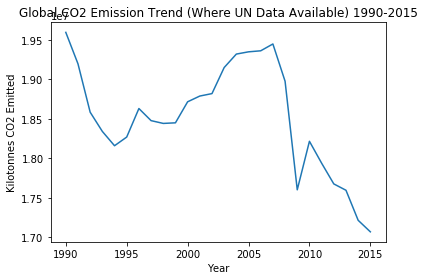

In [32]:
# Aggregate all countries included in the dataset and plot.
df4 = df.groupby('Year').sum()
plt.plot(df4['Value'])
plt.xlabel('Year')
plt.ylabel('Kilotonnes CO2 Emitted')
plt.title('Global CO2 Emission Trend (Where UN Data Available) 1990-2015')
plt.tight_layout()
plt.show()
#Interestingly, global CO2 emissions decreased between 1990-1995, despite the US increasing emissions during that time. 
#Just as we saw above with the US trended emissions data, there is a global drop in emissions from 2008-2011.
#This is likely driven by the US (and trading partners') housing crisis which led to a global recession. I do
#not have sufficient data in this dataset to test this hypothesis, however.

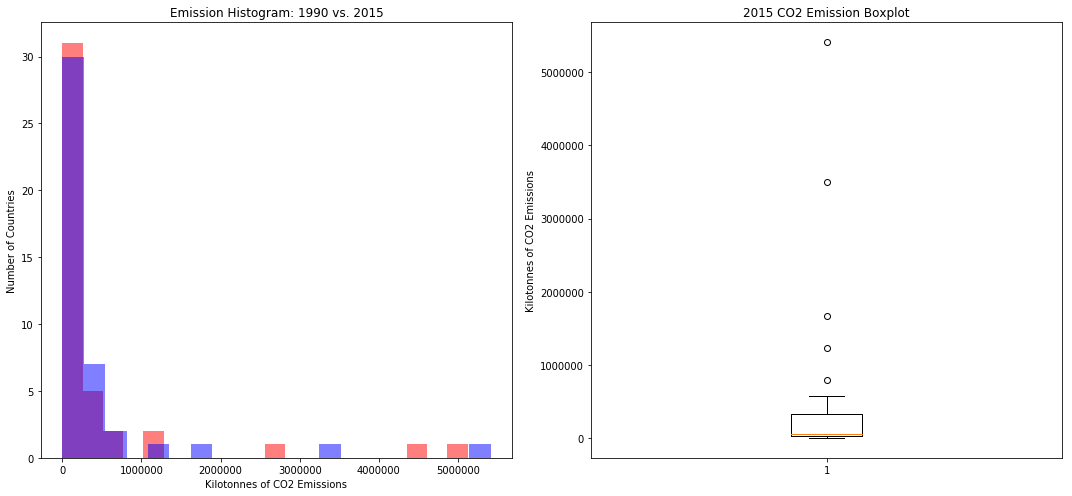

In [33]:
# Compare aggregate CO2 distributions of 1990 with 2015.
df5 = df.loc[lambda df: df['Year'] == 1990, :]
df6 = df.loc[lambda df: df['Year'] == 2015, :]
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.hist(df5['Value'], color = 'red', bins = 20, alpha = 0.5)
plt.hist(df6['Value'], color = 'blue', bins = 20, alpha = 0.5)
plt.ylabel('Number of Countries')
plt.xlabel('Kilotonnes of CO2 Emissions')
plt.title('Emission Histogram: 1990 vs. 2015')
# Show a box-plot of the CO2 emissions for 2015
x = df6['Value']
# Convert column to row array for use in boxplot() function
x_transpose = []
for val in x:
    x_transpose.append(val)
plt.subplot(1,2,2)
plt.boxplot(x_transpose)
plt.ylabel('Kilotonnes of CO2 Emissions')
plt.title('2015 CO2 Emission Boxplot')
plt.tight_layout()
plt.show()
#The histogram shows how the distribution of emissions has changed from 1990 (in red), our starting period, to 2015, 
#our ending period (in blue).

#The box-plot just shows data from 2015. It provides similar information as the histogram, showing that the dataset has several
#significant outlier data points (with the furthest outlier being the United States). Unfortunately for both of these charts,
#the bulk of the countries with data have very low emissions compared to the outliers (orders of magnitude lower), 
#which results in charts that are not very visually appealing or informative.